Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [ ]:
# your code here
import numpy as np
import scipy
import sklearn
from sklearn.datasets import load_wine
from scipy.cluster.vq import kmeans2, whiten
import pandas
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import sqlite3
import pandas as pd
from collections import Counter
pd.options.mode.chained_assignment = None
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename) 
c = conn.cursor()

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [ ]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
d = {165316:{1835254:0, 296394:0, 404385:0, 448990:0},
     1835254:{165316:0, 296394:0, 404385:0, 448990:0},
     296394:{165316:0, 1835254:0, 404385:0, 448990:0},
     404385:{165316:0, 1835254:0, 296394:0, 448990:0},
     448990:{165316:0, 1835254:0, 296394:0, 404385:0}}
c.execute("SELECT visitorID, sequence FROM sequences WHERE visitorID IN (165316, 1835254, 296394, 404385, 448990)")
rows = c.fetchall()
data = {}
for i in rows:
    data[i[0]] = i[1].split('-')

for i in d:
    for j in d[i]:
        for k in range(len(data[i])):
            if data[i][k] != data[j][k]:
                d[i][j] += 1
print(d)

### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

In [ ]:
# Query to get attractions
c.execute("SELECT AttractionID, Name FROM attraction;")
attractions_data = c.fetchall()

# Query to get sequences
c.execute("SELECT visitorID, sequence FROM sequences;")
sequences_data = c.fetchall()

# Process attractions data
names, rideSeq = {}, {}
for attractionID, name in attractions_data:
    names[attractionID] = name
    rideSeq[attractionID] = Counter()

# Process sequences data
for visitorID, sequence in sequences_data:
    sequence_list = sequence.split('-')
    for ind, j in enumerate(sequence_list):
        j = int(j)
        if j in rideSeq:
            rideSeq[j][ind] += 1

# Calculating minimum, maximum, and average
minn, maxx, avg, rides = [], [], [], []
for k, v in rideSeq.items():
    rides.append(names[k])
    values = list(v.values())
    minn.append(min(values))
    maxx.append(max(values))
    avg.append(int(sum(values) / len(values)))

# Visualization using matplotlib
for ride, min_val, max_val, avg_val in zip(rides, minn, maxx, avg):
    plt.plot(['Minimum', 'Maximum', 'Average'], [min_val, max_val, avg_val], label=ride)

plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.ylabel('Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Preparing the final data structure
ans = {}
for ride, min_val, max_val, avg_val in zip(rides, minn, maxx, avg):
    ans[ride] = {'min': min_val, 'max': max_val, 'avg': avg_val}

print(ans)

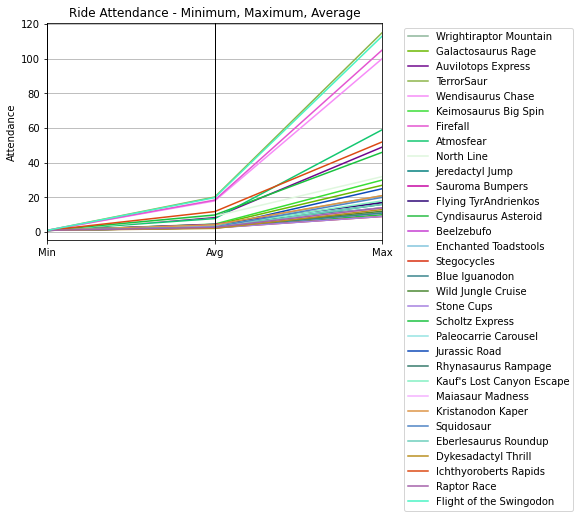

{'Wrightiraptor Mountain': {'min': 1, 'avg': 3.8819471061709465, 'max': 21}, 'Galactosaurus Rage': {'min': 1, 'avg': 4.14050006345983, 'max': 27}, 'Auvilotops Express': {'min': 1, 'avg': 8.554737236300088, 'max': 49}, 'TerrorSaur': {'min': 1, 'avg': 20.23820988528537, 'max': 115}, 'Wendisaurus Chase': {'min': 1, 'avg': 17.97596153846154, 'max': 100}, 'Keimosaurus Big Spin': {'min': 1, 'avg': 4.6141311108346805, 'max': 30}, 'Firefall': {'min': 1, 'avg': 18.467179346333424, 'max': 105}, 'Atmosfear': {'min': 1, 'avg': 7.779286019666524, 'max': 59}, 'North Line': {'min': 1, 'avg': 9.186128803963198, 'max': 32}, 'Jeredactyl Jump': {'min': 1, 'avg': 4.438477951635846, 'max': 14}, 'Sauroma Bumpers': {'min': 1, 'avg': 4.438811753309655, 'max': 17}, 'Flying TyrAndrienkos': {'min': 1, 'avg': 4.11235549132948, 'max': 17}, 'Cyndisaurus Asteroid': {'min': 1, 'avg': 2.494314381270903, 'max': 10}, 'Beelzebufo': {'min': 1, 'avg': 2.594673595323157, 'max': 11}, 'Enchanted Toadstools': {'min': 1, 'avg':

In [20]:
# Query to get attractions with 'ride' in the category
c.execute("SELECT AttractionID, Name FROM attraction WHERE LOWER(Category) LIKE '%ride%';")
attraction_name_category_list = c.fetchall()

# Query to get sequences
c.execute("SELECT visitorID, sequence FROM sequences;")
sequences = c.fetchall()

# Process the sequences data
sequence_list_data = {}
for visitorID, sequence in sequences:
    sequence_list = sequence.split('-')
    sequence_list_data[visitorID] = [int(x) for x in sequence_list]

# Calculating attendance for each ride
outer_dict_q2 = {}
for attractionID, attractionName in attraction_name_category_list:
    attendance_counts = []
    for sequence in sequence_list_data.values():
        attendance = sequence.count(attractionID)
        if attendance > 0:
            attendance_counts.extend([attendance])

    if attendance_counts:
        min_attendance = np.min(attendance_counts)
        avg_attendance = np.mean(attendance_counts)
        max_attendance = np.max(attendance_counts)
    else:
        min_attendance = avg_attendance = max_attendance = 0

    inner_dict_q2 = {"min": min_attendance, "avg": avg_attendance, "max": max_attendance}
    outer_dict_q2[attractionName] = inner_dict_q2

# Creating DataFrame for Parallel Coordinate Plot
df = pd.DataFrame.from_dict(outer_dict_q2, orient='index')
df = df.reset_index()
df.columns = ['Ride', 'Min', 'Avg', 'Max']

# Plotting
pd.plotting.parallel_coordinates(df, 'Ride')
plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.ylabel('Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(outer_dict_q2)

### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

In [22]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
pd.plotting.scatter_matrix(df, alpha=0.5)
plt.title('Scatterplot Matrix - Minimum, Maximum, Average Attendance')
plt.show()

print(ans)

AttributeError: module 'pandas.plotting' has no attribute 'scatter'